In [1]:
pip install matplotlib seaborn



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm

 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
insurance = pd.read_csv('insurance.csv')

In [7]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


W pierwszej kolejności sprawdzamy z jakich danych składa się nasza tabela. Tabela zawiera dane odnośnie wieku, płci, wartości BMI, ilości posiadanych dzieci, czy osoba pali czy nie, z jakiego regionu pochodzi oraz wartość, którą płaci na ubezpieczenie. Są to informacje często uzywane do wyliczania oplat na ubezpieczenie. 

In [8]:
insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


Następnie sprawdzamy czy nasze dane są pełne, czy nie mamy błędnego zbioru danych lub zbioru danych z "dziurami" czyli niepełnego zbioru danych. 

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Sprawdzamy informacje na temat zbioru danych. Mozemy zauwazyć, ze w 3 kolumnach mamy wartości o typie object. Niestety ten typ nie podlega operacjom matematycznym, z uwagi na to nie będzie widoczny w dalszych badaniach korelacji ani wykresach. Mozemy natomiast podstawic inne odpowiadajace wartości za pomocą komendy apply(), ktore podlegają operacjom matematycznym. W dalszej części zadania zostaną podjęte te działania. We wszystkich klumnach z wartościami typu object mamy jedynie 2 mozliwe wartości więc działania będą łatwe do przeprowadzenia.

In [10]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Powyzej mamy pierwsze informacje statystyczne, w pierwszum wierszu mamy informację ile wartości znajduje się w danej kolumnie. W drugim wierszu informacja odnośnie średniej wartości. W trzeciej informacja o odchyleniu standardowym. W wierszu 4 oraz 8 odpowiednio wartości minimalne oraz maksymalne. A w wierszach 5-7 poszczególne kwartyle. 

In [11]:
def zamiensex(x):
    if x == 'male': return 1 
    if x == 'female': return 0

insurance.sex = insurance.sex.apply(zamiensex)
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Zamieniliśmy wartości w typie object na wartości liczbowe w typie int64. Odpowiednio wartość male = 1, a female = 0. Dzięki temu takze te wartości będą brane pod uwagę w dalszym tworzeniu wykresów. Taką samą operację przeprowadzamy dla kolumny smoker oraz region.

In [12]:
def zamiensmoker(x):
    if x == 'yes': return 1 
    if x == 'no': return 0

insurance.smoker = insurance.smoker.apply(zamiensmoker)
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [13]:
insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
def zamienregion(x):
    if x == 'southwest': return 1 
    if x == 'northwest': return 0
    if x == 'southeast': return 2
    if x == 'northeast': return 3

insurance.region = insurance.region.apply(zamienregion)
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

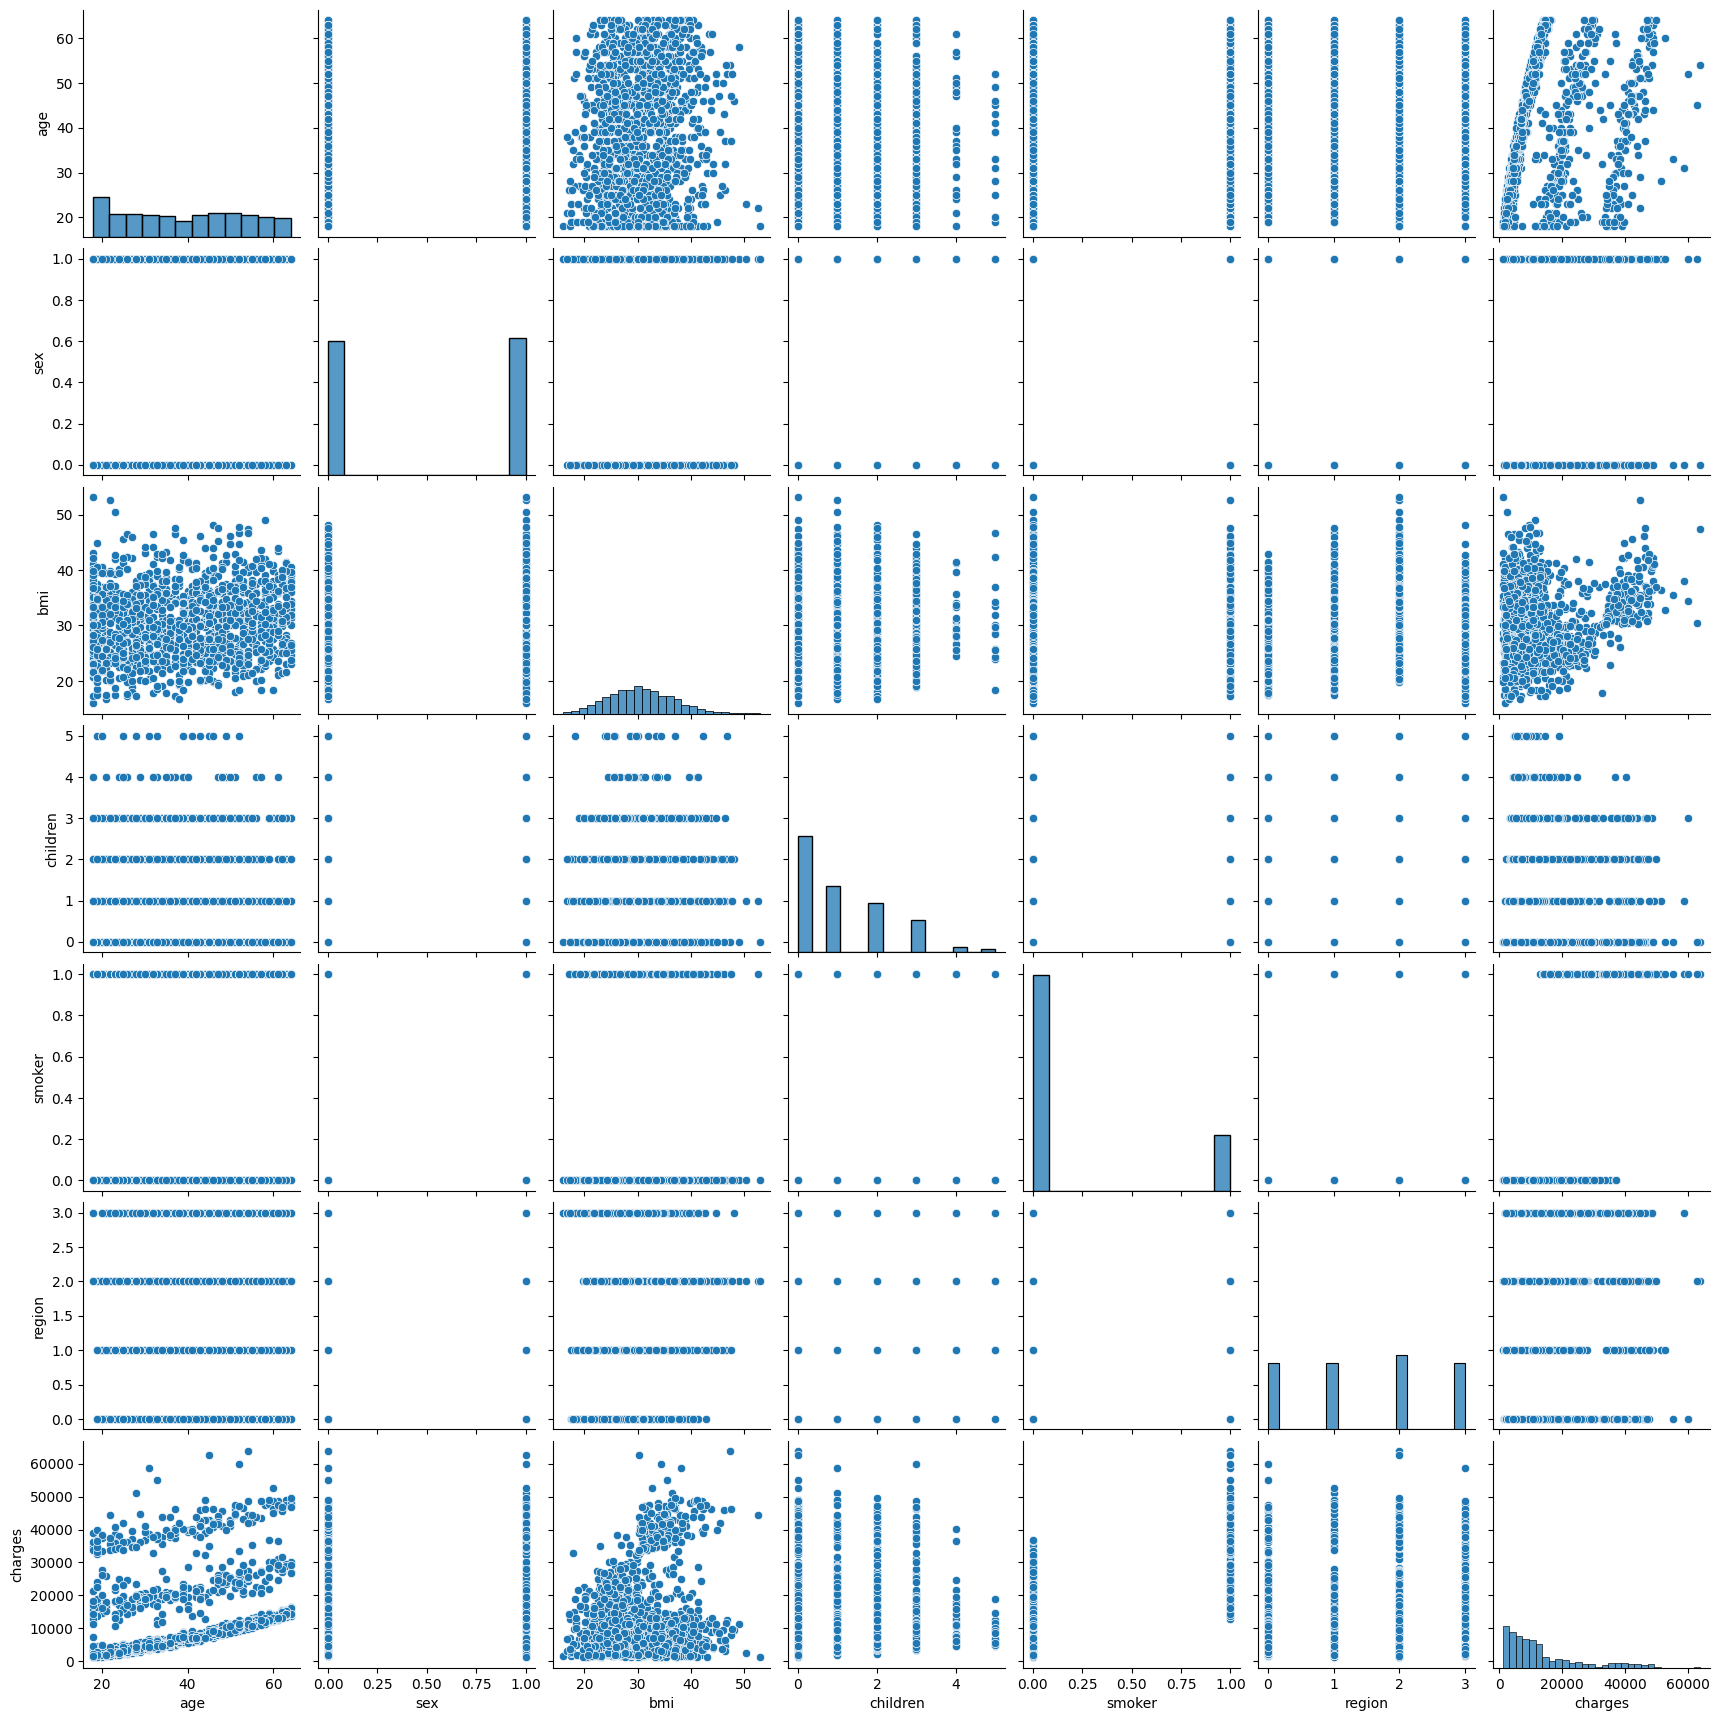

In [15]:
sns.pairplot(insurance)

Na podstawie powyzszych wykresów mozemy wyciagnąć pierwsze wnioski z naszego zbioru danych. 
1. W zbiorze danych występują osoby o 12 róznych wiekach. 
2. Mozemy zauwazyc, ze wykres skupiajacy się na BMI przyjmuje wygląd podobny do rozkładu normalnego
3. Mozemy zauwazyc, ze wraz ze wzrostem wieku zwykle zwiekszają się tez opłaty na ubezpieczenie
4. Korelacja pomiędzy ilością dzieci a wielkością opłat jest niewielka natomiast mozna zauwazyć, ze przy 4 lub 5 dzieciach opłaty są zwykle znacząco mniejsze.
5. Nie widać jasno wyrózniających sie korelacji miedzy danymi w przypadku: bmi i wieku, ilosci dzieci i wieku, bmi i ilosci dzieci, bmi i opłatami.
6. Mozna zauwazyć, ze palenie wpływa na wysokość opłat. 

/var/folders/_m/q76_r4cn20l64ztgb8qj_wvm0000gn/T/ipykernel_55662/2135298546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


<Axes: xlabel='charges', ylabel='Density'>

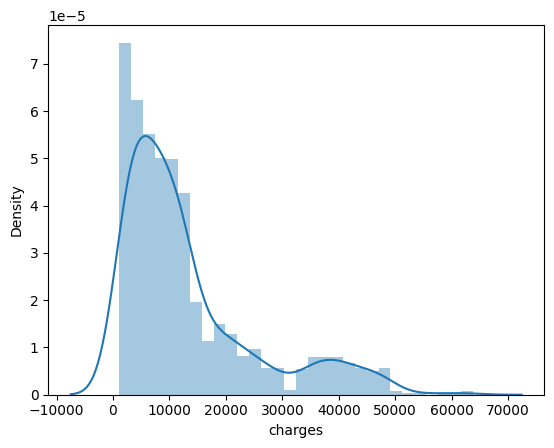

In [16]:
sns.distplot(insurance['charges'])

<Axes: >

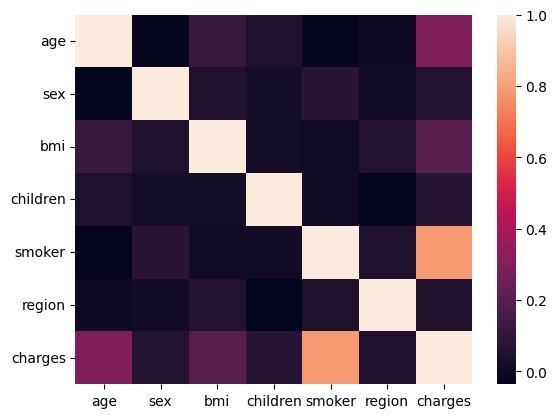

In [17]:
numeric_df = insurance.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

Sprawdzamy dodatkowo korelacje między danymi, które posiadamy w zbiorze. Oprócz jasnych i znanych korelacji, które znajdują się na diagonali, mamy 3 najmocniejsze korelacje. 
1. Najmocniejsza korelacja - między wysokością opłat (charges), a informacja czy osoba ubezpieczana pali. 
2. Druga najmocniejsza korelacja - między wysokością opłat, a wiekiem osoby ubezpieczanej. 
3. Trzecia najmocniejsza korelacja - między wysokością opłat, a BMI osoby ubezpieczanej. 

In [ ]:
W następnym kroku będziemy trenować i wykorzystywać model regresji liniowej. 

In [18]:
X = insurance[['age', 'sex', 'bmi','children', 'smoker', 'region']]
y = insurance['charges']

In [19]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [24]:
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
print(lm.intercept_)

-12624.87299448969


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,259.255978
sex,-76.489916
bmi,345.416050
children,369.009358
smoker,22967.873863
region,46.064362


Interpretacja: 
1. 1 jednostka więcej wieku odpowiada opłatom większym o (w przyblizeniu) 259 jednostek.
2. Męzczyzna średnio płaci o 76 jednostek mniej niz kobieta 
3. Wzrost o jedna jednostkę BMI łączy się ze wzrostem opłat o 345 jednostek 
4. Wzrost ilości dzieci o jedno wziąze się średnio z przyrostem opłat o 369 jednostek 
5. Średnia róznica między opłatami wnoszonymi przez niepalących a palaczy wynosi 22 967 jednostek. 

W tym momencie takze dochodzimy do realizacji, ze to co wcześniej autor (ja) dokonał ze zmianą regionów na liczby 0-3 nie miało najmniejszego sensu i nalezy to zrobic inaczej. Postaramy się to naprawić ponizej. 

In [37]:
from sklearn.preprocessing import LabelEncoder




In [38]:
label_encoder = LabelEncoder()


In [41]:
insurance.region = label_encoder.fit_transform(insurance.region)

print(insurance.region)

0       1
1       2
2       2
3       0
4       0
       ..
1333    0
1334    3
1335    2
1336    1
1337    0
Name: region, Length: 1338, dtype: int64


In [27]:
predictions = lm.predict(X_test)

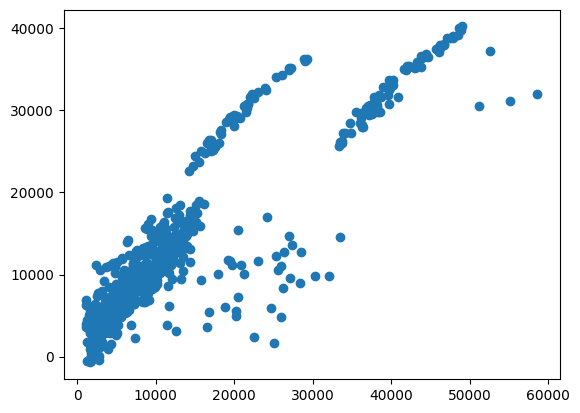

In [28]:
plt.scatter(y_test,predictions)

/var/folders/_m/q76_r4cn20l64ztgb8qj_wvm0000gn/T/ipykernel_55662/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


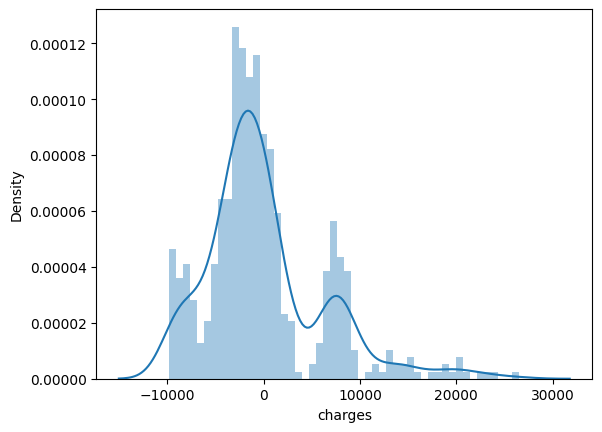

In [29]:
sns.distplot((y_test-predictions),bins=50);

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4473.6633487263025
MSE: 37831851.56116118
RMSE: 6150.760242535973


In [32]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
import statsmodels.api as sn

In [34]:
model = sn.OLS(y_train, X_train)

In [35]:
results = model.fit()

In [36]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              837.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:59:35   Log-Likelihood:                         -8165.5
No. Observations:                 802   AIC:                                  1.634e+04
Df Residuals:                     796   BIC:                                  1.637e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------